As the start the Pandas, NumPy, Seaborn and Matplotlib libraries are imported for basic dataframe processing and model analysis.

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


The dataset is then imported locally , since Support Vector Machines in Scikit-learn will automatically encode the features internally there is no need to use one-hot encoding.

In [10]:
df= pd.read_csv("/workspaces/Predicting-Hypertension-/Hypertension_Cleaned.csv")
df=df.drop('Unnamed: 0', axis=1)# delete unwanted index column
df= df.drop('Risk', axis=1) # delete the binary risk column
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Hyp_stage
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,Normal
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,Stage 1 Hypertension
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,Stage 1 Hypertension
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,Stage 2 Hypertension
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,Stage 1 Hypertension
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,Stage 1 Hypertension
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,Stage 1 Hypertension
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,Stage 2 Hypertension


In [11]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'Hyp_stage'],
      dtype='object')

Below, the dataset is split into the 'X' feature columns and the 'y' labels column Hyp_stage , that contains the categories for each instance. The StandardScaler estimator is imported for standardizing the features to remove the mean and scale to unit variance, this avoids having features that are outweighed by others during training.

The train_test_split method is imported and and applied to split the dataset into 80% training and 20% testing , and a random state of 101 for duplicable shuffling. The GridSearchCV meta-estimator is imported to find the best parameters for the Support Vector Machine and to handle cross validation improving accuracy and performance. Lastly, the StandardScaler is used to transform the training (X_train) and testing (X_test) features, but only fit to the training set to avoid data leakage to affect the test data during training.

In [12]:
X=df.drop('Hyp_stage', axis =1)
y=df['Hyp_stage']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV


scaler=StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


The most important part of the model , the Support Vector Classifier is imported for transformation into a Support Vector Machine through the use of the kernel parameter. The param_grid dictionary is created for use in the GridSearchCV with parameters
- C, for limiting regularization , 
- the kernel , for projecting the data to higher dimensions in order for a selecting a suitable hyperplane in an 12-dimensional space.
- gamma parameter that controls how much the soft margins fit and shape around each support vector
 

In [14]:
from sklearn.svm import SVC

svm= SVC(max_iter=-1)

Param_grid= {

             'C':[0.1, 1, 10, 100],
             'kernel':['rbf','poly','sigmoid'],
              'gamma':['scale', 'auto']

            }



In this section the model is trained on the scaled training features and training string labels through GridSearchCV. The GridSearch handles 5-fold cross validation, and applies the Support Vector Machine algorithm. After training, the model is shown to use a C value of 100, meaning regularization was set to a scale of 0.01 and the automatic gamma parameter was used.

The best kernel was the Radial Basis Function which is a robust and accurate kernel for SVMs.

In [15]:
SvmGridSearch_Model = GridSearchCV(svm, param_grid=Param_grid, cv= 5, n_jobs=-1, verbose=1)
SvmGridSearch_Model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [16]:
SvmGridSearch_Model.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

After training the model, a set of predictions are generated from the scaled test data(scaled_X_test). The predictions are then compared to the actual test data (y_test) using evaluation metrics namely the Confusion Matrix, Receiver Operator Characteristic Curve and a classification report to show percentages for accuracy, precision and F1 score.

In [17]:
y_pred=SvmGridSearch_Model.predict(scaled_X_test)
y_pred

array(['Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Stage 2 Hypertension',
       'Stage 1 Hypertension', 'Normal', 'Stage 2 Hypertension', 'Normal',
       'Stage 2 Hypertension', 'Normal', 'Stage 2 Hypertension',
       'Hypertensive Crisis', 'Stage 1 Hypertension', 'Elevated',
       'Stage 2 Hypertension', 'Elevated', 'Normal', 'Normal',
       'Stage 2 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Normal', 'Normal', 'Stage 2 Hypertension',
       'Normal', 'Stage 2 Hypertension', 'Normal', 'Normal',
       'Stage 2 Hypertension', 'Elevated', 'Stage 1 Hypertension',
       'Elevated', 'Stage 1 Hypertension', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Stage 1 Hypertension',
       'Stage 1 Hypertension', 'Stage 2 Hypertension',
       'Stage 2 Hypertension', 'Stage 2 Hypertension', 'Normal', 'Normal',
       'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Normal',
       'Hypertensive Crisis', 'Stage 2 Hyperte

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the Support Vector Machine is {0}'.format(accuracy))

The accuracy of the Support Vector Machine is 0.8938679245283019


In [21]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

            Elevated       0.70      0.81      0.75        80
 Hypertensive Crisis       0.94      0.94      0.94        33
              Normal       0.93      0.92      0.93       224
Stage 1 Hypertension       0.89      0.84      0.87       250
Stage 2 Hypertension       0.93      0.94      0.93       261

            accuracy                           0.89       848
           macro avg       0.88      0.89      0.88       848
        weighted avg       0.90      0.89      0.89       848



Overall, the Support Vector Machine model shows robust prediction and an accuracy of 89%. The model is highly dependable when detecting the extreme positive and extreme negative cases which are Hypertensive Crisis and Normal classes respectively.

Four classes have good precision ratios above 89%, the gray area being the Elevated hypertension stage which has a precision ratio of 70 % and a significantly lower F1-score of 75%. This indicates that the Elevated class would need a little more support than 80 samples for sufficient training. 

Confusion matrix
When examining the confusion matrix of the Support Vector Machines classifications it is shown that:
- the Elevated hypertension class is mostly confused with the Stage 1 Hypertension class. This suggests that the two classes can show very similar medical features or a real    world dataset would be needed to show clearer classification. 
-the Hypertension Crisis stage is only incorrectly predicted twice, showing good clear classification, which would be very important for such a high risk stage
-the Normal classification follows suite with accurate predictions 206 times out of 224 samples.the stage was mistaken for stage one 10 times and only confused 5 times with Elevated hypertension stage.
-Stage 1 Hypertension is classified correctly 211 times and mistaken for Stage two 11 times and mistaken for Elevated hypertension 10 times. This follows realistic expectations.
-Stage 2 is mistaken for Stage two 11 times but overall classified quite accurately.

In [22]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 65,   0,   5,  10,   0],
       [  0,  31,   0,   0,   2],
       [  7,   0, 206,   5,   6],
       [ 18,   0,  10, 211,  11],
       [  3,   2,   0,  11, 245]])

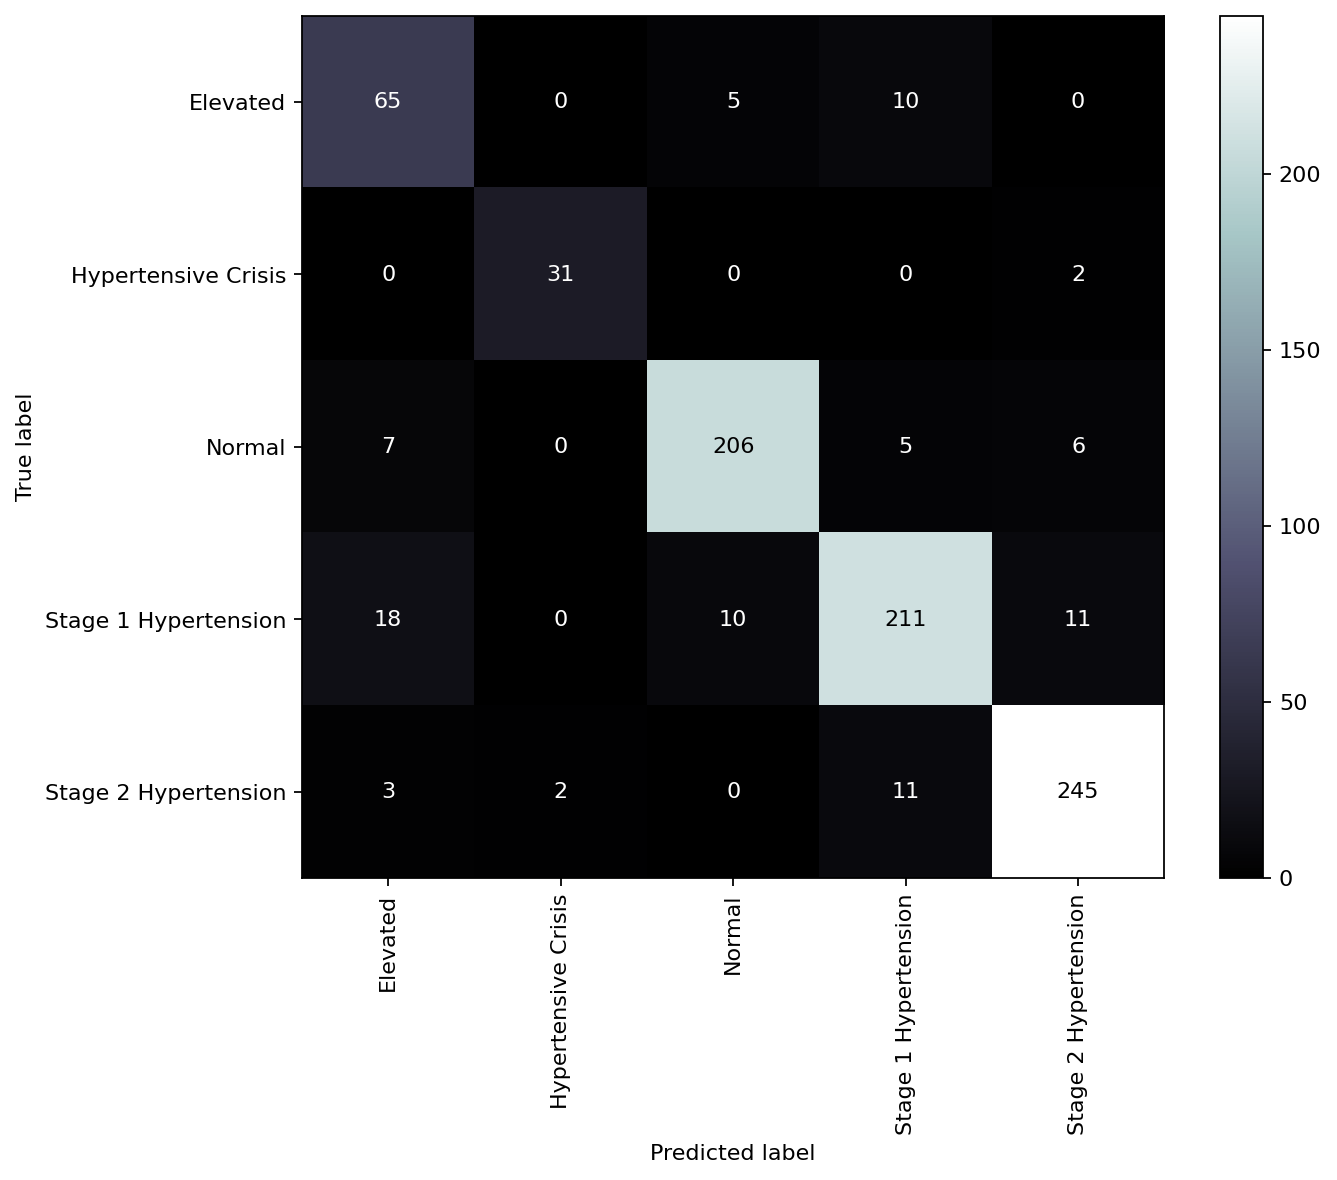

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SvmGridSearch_Model.classes_)
fig, ax = plt.subplots(figsize=(9, 7), dpi=160)
disp.plot(ax=ax, cmap='bone')
plt.xticks(rotation=90)
plt.show()

Receiver Operator Characteristic (ROC) Curve
Below the multi-class ROC curve is plotted using the plot_multiclass_roc function. The results show significantly better Area Under Curve (AUC) values overall with nearly perfect plots through all 5 classes.

In [24]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(6, 6)):
    # use decision_function or predict_proba depending on model
    try:
        y_score = clf.decision_function(X_test)
    except AttributeError:
        y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # convert true labels to binary matrix
    y_test_bin = pd.get_dummies(y_test, drop_first=False).values

    # compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot ROC curves
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Multiclass ROC Curve')

    # stage names
    stage_names = ['Elevated', 'Hypertensive Crisis', 'Normal', 'Stage 1 Hypertension', 'Stage 2 Hypertension']

    # plot each ROC curve
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i],
                label=f'ROC curve (area = {roc_auc[i]:.2f}) for {stage_names[i]}')
    
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    sns.despine()
    plt.show()


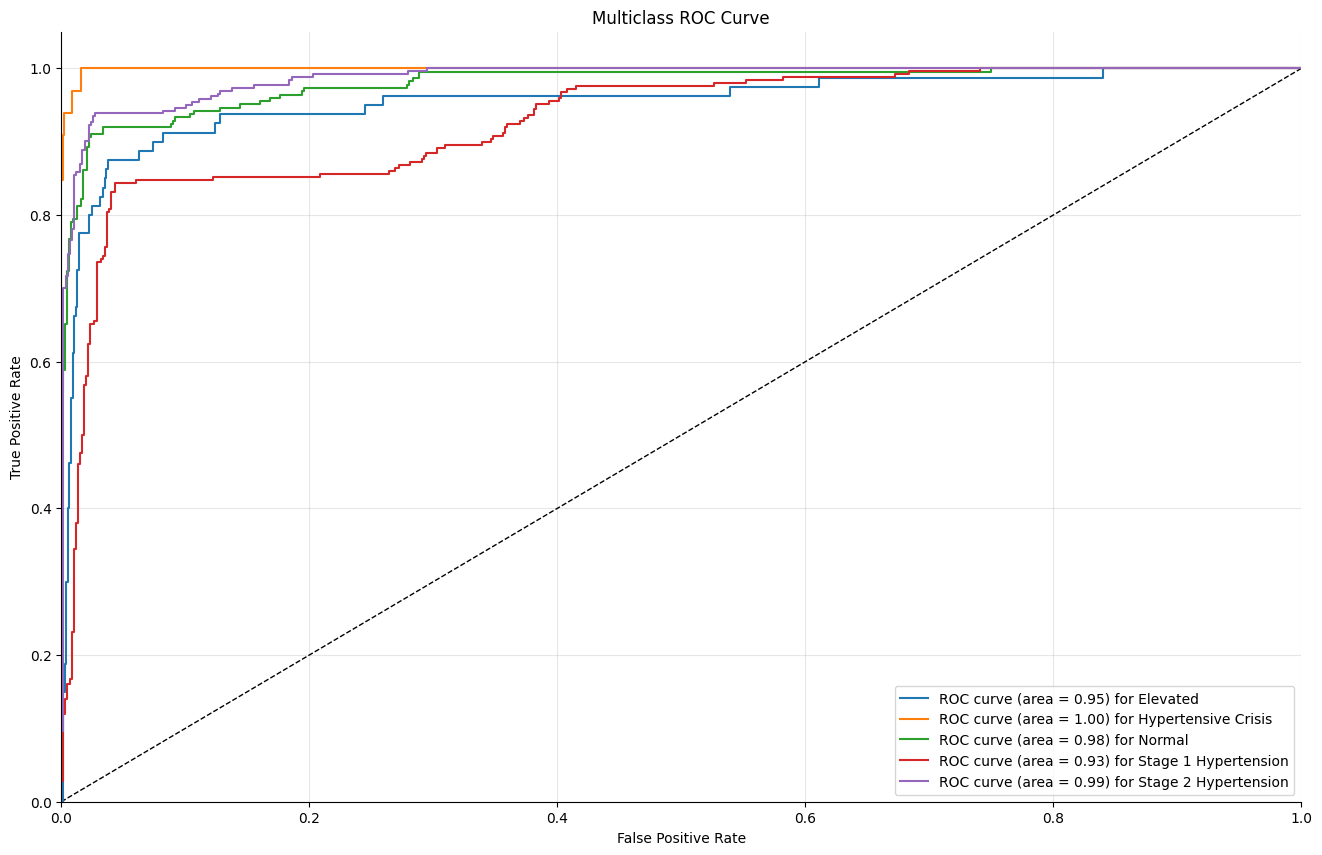

In [25]:
plot_multiclass_roc(SvmGridSearch_Model, scaled_X_test, y_test, n_classes=5, figsize=(16, 10))
